## Model Building

In [2]:
library(MASS)

In [3]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")
set.seed(42)

In [4]:
B <- 1e4

In [5]:
init_data <- read.csv("data/merged_data.csv")[, -1]
init_data$food <- NULL
init_data$manufac <- NULL

# init_data <- init_data[, 1:5]

head(init_data)

,year,month,GEO,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>
1,2022,April,Alberta,4480956,17,7989056,3983,6069621
2,2022,April,British Columbia,5310164,42,8959229,77433,5240902
3,2022,April,Manitoba,1405197,2,2083495,6290,2168371
4,2022,April,New Brunswick,801778,5,1340707,1818,1171958
5,2022,April,Newfoundland and Labrador,529249,2,920444,77160,686123
6,2022,April,Northwest Territories,44828,0,76390,0,58889


In [6]:
standardize <- function(x, mu, std) {
    return((x-mu)/std)
}

In [7]:
init_data$pop <- sapply(init_data$pop, function(x) {standardize(x, mean(init_data$pop), sd(init_data$pop))})
init_data$retail <- sapply(init_data$retail, function(x) {standardize(x, mean(init_data$retail), sd(init_data$retail))})
init_data$power <- sapply(init_data$power, function(x) {standardize(x, mean(init_data$power), sd(init_data$power))})
init_data$oil <- sapply(init_data$oil, function(x) {standardize(x, mean(init_data$oil), sd(init_data$oil))})

In [8]:
colnames(init_data)[colnames(init_data) == "GEO"] <- "prov"
head(init_data)

,year,month,prov,pop,protests,retail,oil,power
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2022,April,Alberta,0.3320973,17,0.4154217,-0.5884488,0.4393113
2,2022,April,British Columbia,0.5216659,42,0.5517610,0.1768355,0.2824956
3,2022,April,Manitoba,-0.3710644,2,-0.4144921,-0.5644119,-0.2989093
4,2022,April,New Brunswick,-0.5090145,5,-0.5188768,-0.6110062,-0.4874573
5,2022,April,Newfoundland and Labrador,-0.5713185,2,-0.5779367,0.1739911,-0.5793902
6,2022,April,Northwest Territories,-0.6820639,0,-0.6965524,-0.6299482,-0.6980796


In [9]:
init_data$prov  <- as.factor(init_data$prov)
init_data$month <- as.factor(init_data$month)
init_data$year <- as.factor(init_data$year)

In [10]:
head(init_data)

,year,month,prov,pop,protests,retail,oil,power
,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2022,April,Alberta,0.3320973,17,0.4154217,-0.5884488,0.4393113
2,2022,April,British Columbia,0.5216659,42,0.5517610,0.1768355,0.2824956
3,2022,April,Manitoba,-0.3710644,2,-0.4144921,-0.5644119,-0.2989093
4,2022,April,New Brunswick,-0.5090145,5,-0.5188768,-0.6110062,-0.4874573
5,2022,April,Newfoundland and Labrador,-0.5713185,2,-0.5779367,0.1739911,-0.5793902
6,2022,April,Northwest Territories,-0.6820639,0,-0.6965524,-0.6299482,-0.6980796


In [34]:
sapply(init_data[, -c(3)], as.numeric)

year,month,pop,protests,retail,oil,power
1,1,0.3320973,17,0.4154217,-0.58844881,0.4393113
1,1,0.5216659,42,0.5517610,0.17683553,0.2824956
1,1,-0.3710644,2,-0.4144921,-0.56441190,-0.2989093
1,1,-0.5090145,5,-0.5188768,-0.61100621,-0.4874573
1,1,-0.5713185,2,-0.5779367,0.17399111,-0.5793902
1,1,-0.6820639,0,-0.6965524,-0.62994817,-0.6980796
1,1,-0.4603085,2,-0.4699081,-0.13169544,-0.5390880
1,1,-0.6830559,0,-0.7004528,-0.62994817,-0.7061819
1,1,2.7474632,46,2.7521281,2.15911473,1.3188851
1,1,-0.6544711,0,-0.6694827,-0.62994817,-0.6847955


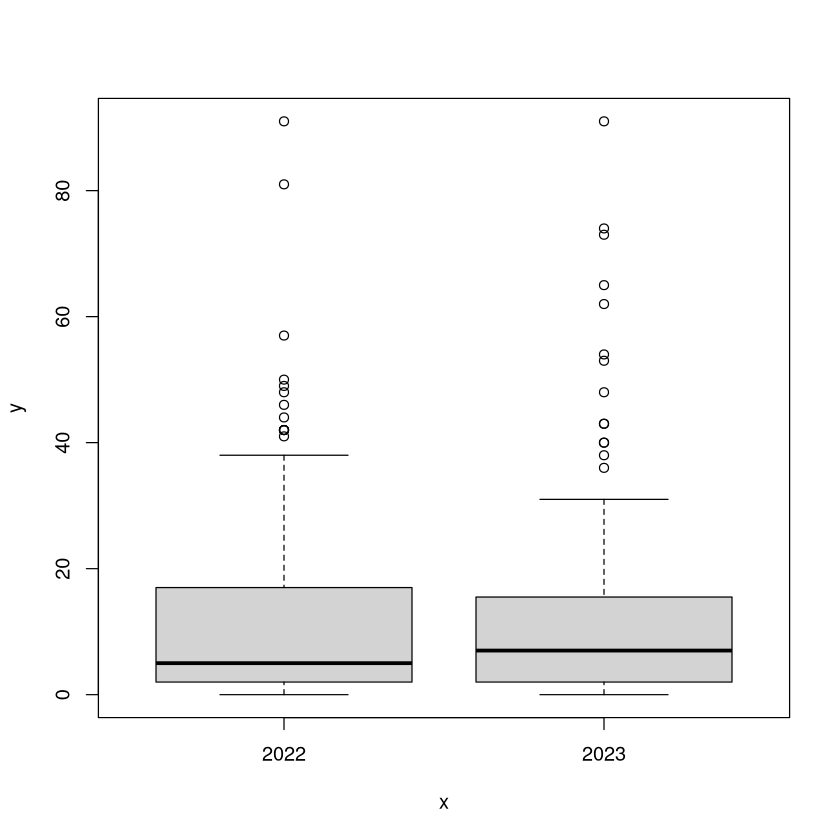

In [38]:
plot(data$year, data$protests)

In [13]:
data <- init_data

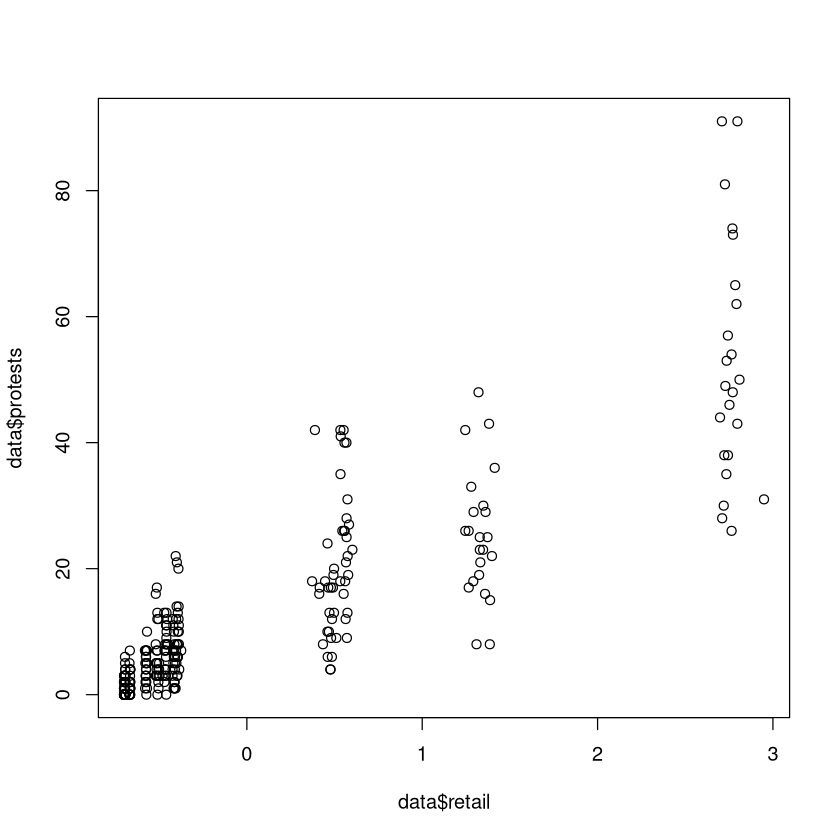

In [22]:
plot(x=data$retail, y=data$protests)

Warning message in plot(x = log10(data$power), y = data$protests):
“NaNs produced”


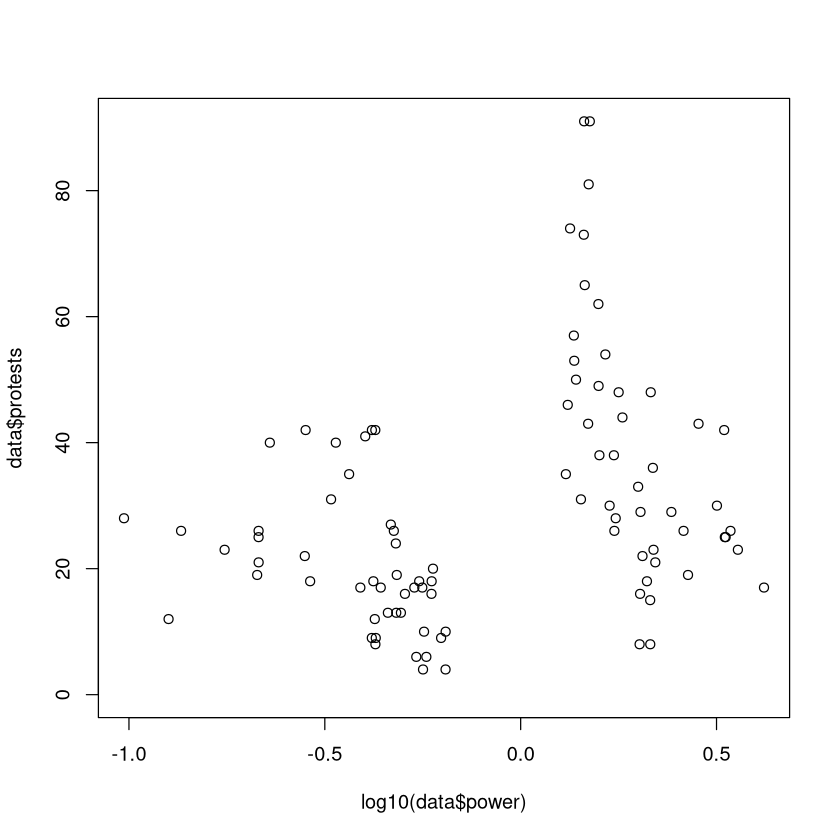

In [17]:
plot(x=log10(data$power), y=data$protests)

## Fitting the Model

In [10]:
model1 <- glm.nb(protests ~., data=init_data, init.theta = 1)

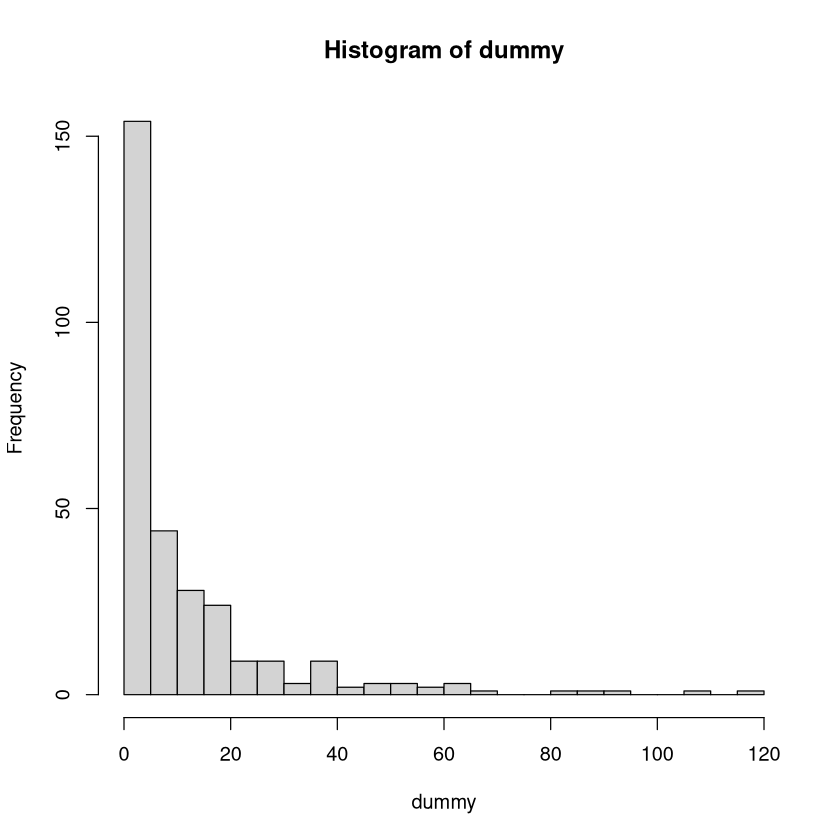

In [11]:
dummy <- rnegbin(fitted(model1), theta = 10.75)
hist(dummy, breaks=25)

In [12]:
anova(model1)

Warning message in anova.negbin(model1):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,298,2368.9063,NA
year,1,1.143289e+00,297,2367.7630,2.849583e-01
month,11,8.988210e+01,286,2277.8809,1.758231e-14
prov,12,1.918190e+03,274,359.6911,0.000000e+00
pop,1,1.223328e+00,273,358.4678,2.687085e-01
retail,1,5.846439e+00,272,352.6213,1.560860e-02
oil,1,1.275936e-01,271,352.4937,7.209403e-01
power,1,4.744238e-04,270,352.4932,9.826224e-01


In [15]:
data <- init_data[, -c(1, 4, 7, 8)]
model <- glm.nb(protests ~., data=data, init.theta = 1)

summary(step(model))
# names(summary(model))
# summary(model)

Start:  AIC=1575.14
protests ~ month + prov + retail

         Df Deviance    AIC
<none>        349.96 1575.1
- retail  1   353.33 1576.5
- month  11   427.75 1630.9
- prov   12   776.73 1977.9



Call:
glm.nb(formula = protests ~ month + prov + retail, data = data, 
    init.theta = 10.18063071, link = log)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    3.65668    0.47411   7.713 1.23e-14 ***
monthAugust                   -0.70436    0.14523  -4.850 1.24e-06 ***
monthDecember                 -0.62893    0.17979  -3.498 0.000468 ***
monthFebruary                  0.04864    0.13137   0.370 0.711202    
monthJanuary                  -0.32840    0.13717  -2.394 0.016659 *  
monthJuly                     -0.55333    0.14189  -3.900 9.63e-05 ***
monthJune                     -0.35116    0.14006  -2.507 0.012169 *  
monthMarch                    -0.10604    0.13373  -0.793 0.427836    
monthMay                      -0.03083    0.13355  -0.231 0.817414    
monthNovember                 -0.07729    0.13463  -0.574 0.565876    
monthOctober                   0.03975    0.13339   0.298 0.765707    
monthSeptember     

## Bootstrap Methods

### 1. Resampling Bootstrap

In [36]:
resampBoot <- function(df, B) {

    # Get sample size
    n <- nrow(df)
    # Initialize empty dataframe
    params <- c()
    # Initialize progress bar
    bar <- txtProgressBar(min=0, max=B, style=1)
    # Perform B iterations
    for (b in 1:B) {
        # Select a sample of size n
        indices <- sample(1:n, replace = TRUE)
        samp <- df[indices, ]
        # Fit the model with the sample
        boot_model <- glm.nb(protests ~., data=samp, init.theta = 10)
        boot_params <- coef(boot_model)
        params <- rbind(params, boot_params)
        setTxtProgressBar(bar, b)
    }
    close(bar)
    return(params)

}

boot_models <- resampBoot(data, B)

In [37]:
boot_models <- as.data.frame(boot_models)
boot_models

,(Intercept),monthAugust,monthDecember,monthFebruary,monthJanuary,monthJuly,monthJune,monthMarch,monthMay,monthNovember,⋯,provNewfoundland and Labrador,provNorthwest Territories,provNova Scotia,provNunavut,provOntario,provPrince Edward Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
boot_params,3.419547,-0.7037457,-0.6483113,0.097348681,-0.283816615,-0.3234719,-0.316021374,-0.072386673,-0.075982190,-0.273993547,⋯,-2.9013972,-4.816554,-2.270714,-4.556042,5.5869818,-3.603132,2.2340880,-2.2300045,-4.051911,-1.7591690
boot_params.1,3.684708,-0.4632654,-0.3630316,0.406200014,-0.415891852,-0.6241891,-0.232364348,-0.038525892,0.128441228,-0.016290662,⋯,-3.4489324,-5.342008,-2.706440,-5.167822,5.8485095,-4.301684,2.3020167,-2.8229266,-4.161925,-1.9983200
boot_params.2,4.063082,-0.8329432,-0.6244357,0.068459742,-0.535177645,-0.7537557,-0.468601453,-0.137219074,-0.068789411,-0.085642501,⋯,-3.8090715,-6.938115,-2.913779,-5.907097,7.1842258,-5.190024,2.8312895,-3.1935928,-5.034360,-2.6159746
boot_params.3,3.913602,-0.5064475,-0.3399569,0.253063307,-0.245939756,-0.5368325,-0.197714976,-0.085445570,0.283093038,0.118474554,⋯,-3.6258470,-6.105290,-3.111887,-5.921944,7.0274196,-5.156367,2.6273483,-3.3915940,-5.108888,-2.5042144
boot_params.4,3.332427,-0.9068816,-0.5865708,0.161794310,-0.018588844,-0.5287837,-0.392100557,0.049363046,-0.257664382,0.006255248,⋯,-2.6159745,-5.062644,-2.111954,-4.348641,4.8622572,-3.701271,1.8920621,-2.0848114,-3.869974,-1.4854129
boot_params.5,3.237874,-0.6681563,-0.3577321,0.040139628,-0.224213922,-0.5389148,-0.423610776,-0.071004820,-0.112392527,-0.185383498,⋯,-2.2378420,-4.373814,-1.618526,-3.596865,4.1530775,-3.199920,1.6726391,-1.8219079,-3.304254,-1.2010305
boot_params.6,3.867920,-0.5325458,-0.7609300,-0.064708667,-0.442710702,-0.5948450,-0.481663838,-0.122874661,-0.098835646,-0.195587010,⋯,-3.1937587,-5.187160,-2.459890,-5.013017,6.0209258,-4.026615,2.4659285,-2.7833851,-4.451634,-2.0462374
boot_params.7,3.418318,-0.6747112,-0.5774607,0.086614858,-0.317529965,-0.7661096,-0.535685596,-0.104273848,-0.095221814,-0.063186122,⋯,-2.1920915,-4.371530,-1.706441,-4.437749,3.9582652,-3.175966,1.6650025,-1.9946387,-3.286881,-1.1786876
boot_params.8,3.864469,-0.5857499,-0.3759562,-0.023496572,-0.302228025,-0.6010992,-0.202289872,0.156222873,0.134360085,0.017074978,⋯,-3.6425564,-5.833158,-2.934011,-6.127802,7.0395968,-4.566895,2.6042332,-3.1768767,-4.870776,-2.4496934


In [38]:
write.csv(boot_models, "data/results/resamp_boot_results.csv")

### 2. Parametric Bootstrap

In [39]:
parametricBoot <- function(X, model, B, err_mean, err_sd, errors) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    # Perform B iterations
    for (b in 1:B) {
        # Get errors
        # errs <- rnorm(n=n, mean=err_mean, sd=1)
        errs <- sample(errors, size=n, replace=TRUE)
        # Get fitted values
        yhat <- fitted(model)
        # Get simulated y
        ystar <- yhat + errs
        # round up negative values
        ystar <- pmax(rep(0, n), ystar)
        # Turn into DataFrame
        sim_data <- data.frame(protests=ystar, X)
        # round to integers
        # sim_data$protests <- round(sim_data$protests)
        
        # Fit the model with the simulated data
        paramboot_model <- glm.nb(protests ~., data=sim_data, init.theta = 5)
        boot_params <- coef(paramboot_model)
        params <- rbind(params, boot_params)
    }
    return(params)
}

In [40]:
model <- glm.nb(protests ~., data=data, init.theta = 1)

In [41]:
X <- data[, c(1,2,4)]
epsilon <- resid(model)
err_mean <- mean(epsilon)
err_sd <- sd(epsilon)

suppressWarnings({
  parametric_models <- parametricBoot(X, model, B, err_mean, err_sd, epsilon)
})

parametric_models

,(Intercept),monthAugust,monthDecember,monthFebruary,monthJanuary,monthJuly,monthJune,monthMarch,monthMay,monthNovember,⋯,provNewfoundland and Labrador,provNorthwest Territories,provNova Scotia,provNunavut,provOntario,provPrince Edward Island,provQuebec,provSaskatchewan,provYukon,retail
boot_params,3.640661,-0.7113855,-0.6001839,0.037540735,-0.3291272,-0.5665089,-0.3444224,-0.12542327,-0.056715966,-0.08064738,⋯,-2.979508,-5.075801,-2.350314,-4.695685,5.453877,-3.925992,2.146141,-2.631938,-4.071375,-1.790921
boot_params,3.714884,-0.6983527,-0.6515041,0.017717882,-0.3742808,-0.5673310,-0.3973692,-0.12754732,-0.056627033,-0.08692926,⋯,-3.279589,-4.946030,-2.542413,-5.585256,5.920994,-4.261460,2.340959,-2.672914,-4.195592,-1.985100
boot_params,3.534922,-0.7292106,-0.6225813,0.067657303,-0.3341109,-0.5333642,-0.3647926,-0.08201521,-0.019383744,-0.07752004,⋯,-2.781480,-4.708229,-2.211856,-4.894292,4.936877,-3.916424,1.930388,-2.376259,-4.030509,-1.568164
boot_params,3.710852,-0.6973064,-0.6732067,0.026414541,-0.3293934,-0.5613573,-0.3593326,-0.09603751,0.001152663,-0.06650503,⋯,-3.209849,-5.616715,-2.500553,-5.197891,5.787886,-4.156145,2.250135,-2.703044,-4.214661,-1.943104
boot_params,3.589159,-0.7083993,-0.6182302,0.069504863,-0.3043318,-0.5494891,-0.3448762,-0.07503539,-0.020875561,-0.04332405,⋯,-2.982272,-5.605658,-2.379793,-4.827080,5.583337,-4.008610,2.203130,-2.594399,-4.217903,-1.828977
boot_params,3.576359,-0.7155790,-0.6398321,0.037327917,-0.3385107,-0.5476008,-0.3664726,-0.10316924,-0.009976424,-0.07498440,⋯,-2.968212,-4.855260,-2.298928,-4.803781,5.427710,-4.050764,2.164797,-2.543666,-4.073835,-1.761327
boot_params,3.642353,-0.6964665,-0.6698365,0.050734270,-0.3255439,-0.5621384,-0.3532075,-0.12995761,-0.018342054,-0.11911523,⋯,-3.059573,-5.494710,-2.399255,-4.871179,5.522241,-4.111710,2.168777,-2.520092,-4.067099,-1.815019
boot_params,3.723652,-0.7617281,-0.5687570,0.034484485,-0.3507781,-0.6231788,-0.3578178,-0.13512289,-0.039633536,-0.07877222,⋯,-3.207363,-5.104655,-2.581763,-4.633272,5.830383,-4.706282,2.279104,-2.706780,-4.348362,-1.956646
boot_params,3.657538,-0.6795760,-0.6516659,0.042552275,-0.2908446,-0.5727291,-0.3877175,-0.09747880,-0.031343863,-0.08065058,⋯,-3.069459,-5.450201,-2.458646,-4.700709,5.645126,-4.204978,2.222442,-2.629472,-4.108850,-1.869679
boot_params,3.688660,-0.6395163,-0.5829838,0.078160419,-0.3046698,-0.5730563,-0.3418049,-0.12995551,-0.010381089,-0.03531197,⋯,-3.266343,-5.204048,-2.518589,-5.036829,5.914291,-4.470644,2.310131,-2.685577,-4.256843,-1.987595


In [42]:
param_results <- as.data.frame(parametric_models)
param_results

,(Intercept),monthAugust,monthDecember,monthFebruary,monthJanuary,monthJuly,monthJune,monthMarch,monthMay,monthNovember,⋯,provNewfoundland and Labrador,provNorthwest Territories,provNova Scotia,provNunavut,provOntario,provPrince Edward Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
boot_params,3.640661,-0.7113855,-0.6001839,0.037540735,-0.3291272,-0.5665089,-0.3444224,-0.12542327,-0.056715966,-0.08064738,⋯,-2.979508,-5.075801,-2.350314,-4.695685,5.453877,-3.925992,2.146141,-2.631938,-4.071375,-1.790921
boot_params.1,3.714884,-0.6983527,-0.6515041,0.017717882,-0.3742808,-0.5673310,-0.3973692,-0.12754732,-0.056627033,-0.08692926,⋯,-3.279589,-4.946030,-2.542413,-5.585256,5.920994,-4.261460,2.340959,-2.672914,-4.195592,-1.985100
boot_params.2,3.534922,-0.7292106,-0.6225813,0.067657303,-0.3341109,-0.5333642,-0.3647926,-0.08201521,-0.019383744,-0.07752004,⋯,-2.781480,-4.708229,-2.211856,-4.894292,4.936877,-3.916424,1.930388,-2.376259,-4.030509,-1.568164
boot_params.3,3.710852,-0.6973064,-0.6732067,0.026414541,-0.3293934,-0.5613573,-0.3593326,-0.09603751,0.001152663,-0.06650503,⋯,-3.209849,-5.616715,-2.500553,-5.197891,5.787886,-4.156145,2.250135,-2.703044,-4.214661,-1.943104
boot_params.4,3.589159,-0.7083993,-0.6182302,0.069504863,-0.3043318,-0.5494891,-0.3448762,-0.07503539,-0.020875561,-0.04332405,⋯,-2.982272,-5.605658,-2.379793,-4.827080,5.583337,-4.008610,2.203130,-2.594399,-4.217903,-1.828977
boot_params.5,3.576359,-0.7155790,-0.6398321,0.037327917,-0.3385107,-0.5476008,-0.3664726,-0.10316924,-0.009976424,-0.07498440,⋯,-2.968212,-4.855260,-2.298928,-4.803781,5.427710,-4.050764,2.164797,-2.543666,-4.073835,-1.761327
boot_params.6,3.642353,-0.6964665,-0.6698365,0.050734270,-0.3255439,-0.5621384,-0.3532075,-0.12995761,-0.018342054,-0.11911523,⋯,-3.059573,-5.494710,-2.399255,-4.871179,5.522241,-4.111710,2.168777,-2.520092,-4.067099,-1.815019
boot_params.7,3.723652,-0.7617281,-0.5687570,0.034484485,-0.3507781,-0.6231788,-0.3578178,-0.13512289,-0.039633536,-0.07877222,⋯,-3.207363,-5.104655,-2.581763,-4.633272,5.830383,-4.706282,2.279104,-2.706780,-4.348362,-1.956646
boot_params.8,3.657538,-0.6795760,-0.6516659,0.042552275,-0.2908446,-0.5727291,-0.3877175,-0.09747880,-0.031343863,-0.08065058,⋯,-3.069459,-5.450201,-2.458646,-4.700709,5.645126,-4.204978,2.222442,-2.629472,-4.108850,-1.869679


In [43]:
write.csv(param_results, "data/results/param_boot_results.csv")

### 3. Smooth Bootstrap

In [44]:
addNoise <- function(X) {

    cols <- colnames(X)
    new_X <- X
    for (col in cols) {
        Xi <- X[, col]
        if (class(data[, col]) != "factor") {
            n <- length(Xi)
            S_sq <- var(Xi)
            noise_var <- S_sq / n
            new_X[, col] <- Xi + rnorm(n=n, mean=0, sd=sqrt(noise_var))
        } else {
            new_X[, col] <- Xi
        }
    }
    return(new_X)
}

In [45]:
smoothBoot <- function(X, y, B, noisefunc) {

    # Get sample size
    n <- nrow(X)
    # Initialize empty vector
    params <- c()
    
    # Initialize progress bar
    pb <- txtProgressBar(min = 0, max = B, style = 3)
    
    # Perform B iterations
    for (b in 1:B) {
        # Update progress bar
        setTxtProgressBar(pb, b)
        
        # Get new dataset
        new_X <- noisefunc(X)
        new_data <- data.frame(protests=y, new_X)
        
        # Fit the model with the simulated data
        smoothboot_model <- glm.nb(protests ~., data=new_data, init.theta = 5)
        boot_params <- coef(smoothboot_model)
        params <- rbind(params, boot_params)
    }
    
    # Close progress bar
    close(pb)
    
    return(params)
}

In [46]:
X <- data[, c(1,2,4)]
y <- data$protests
smooth_data <- smoothBoot(X, y, B, addNoise)

  |                                                                      |   0%

  |======================================================================| 100%


In [47]:
smooth_results <- as.data.frame(smooth_data)
head(smooth_results)

,(Intercept),monthAugust,monthDecember,monthFebruary,monthJanuary,monthJuly,monthJune,monthMarch,monthMay,monthNovember,⋯,provNewfoundland and Labrador,provNorthwest Territories,provNova Scotia,provNunavut,provOntario,provPrince Edward Island,provQuebec,provSaskatchewan,provYukon,retail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
boot_params,3.042974,-0.7075125,-0.6285048,0.08062702,-0.3119475,-0.5522937,-0.3723088,-0.07867229,-0.02594657,-0.07255638,⋯,-1.691314,-3.830937,-1.1910794,-3.455211,2.575305,-2.624511,1.0724846,-1.443182,-2.610933,-0.53944067
boot_params.1,2.840350,-0.7181788,-0.6397646,0.06457399,-0.3151501,-0.5667900,-0.3912947,-0.08480733,-0.05076387,-0.10756639,⋯,-1.201753,-3.280668,-0.7482947,-2.897493,1.473973,-2.086430,0.6447140,-1.012432,-2.058872,-0.05849754
boot_params.2,3.175008,-0.7266505,-0.6159961,0.04581576,-0.3334646,-0.5976878,-0.3835097,-0.12154601,-0.05675519,-0.10431817,⋯,-1.920269,-4.086201,-1.4103477,-3.711722,3.044718,-2.872897,1.2377529,-1.639692,-2.861983,-0.74791809
boot_params.3,2.990545,-0.7019588,-0.6439237,0.06847743,-0.3112170,-0.5583725,-0.3830918,-0.08096058,-0.04787794,-0.10297156,⋯,-1.550961,-3.675525,-1.0633174,-3.279802,2.253407,-2.476466,0.9331539,-1.312389,-2.451581,-0.39571207
boot_params.4,2.854007,-0.7183029,-0.6364848,0.06482322,-0.3138206,-0.5655561,-0.3885454,-0.08329184,-0.05026195,-0.10423672,⋯,-1.235825,-3.314656,-0.7757279,-2.933887,1.542714,-2.123014,0.6698362,-1.038867,-2.097920,-0.08936420
boot_params.5,3.022951,-0.7112431,-0.6404678,0.06097678,-0.3216719,-0.5701039,-0.3844488,-0.08170583,-0.05657810,-0.11406371,⋯,-1.613792,-3.723673,-1.1164335,-3.353278,2.336172,-2.522573,0.9642873,-1.347348,-2.512563,-0.44144075


In [48]:
write.csv(smooth_results, "data/results/smooth_boot_results.csv")